In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
result_df=pd.read_csv("/Users/chandu/Downloads/ML_projectextracted_data.csv")

In [4]:
result_df['TARGET'].value_counts()

0    48235
1    24825
Name: TARGET, dtype: int64

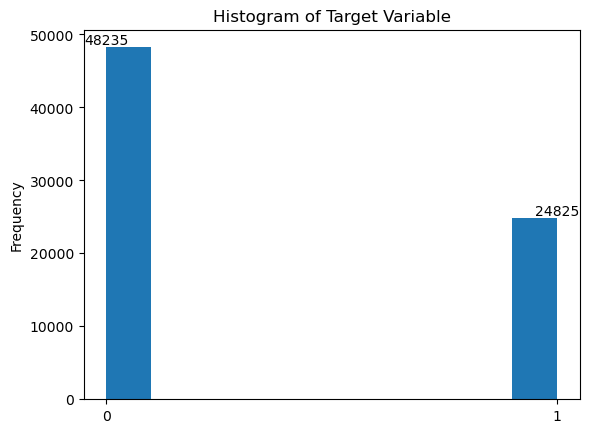

In [5]:
import matplotlib.pyplot as plt

# Assuming result_df['TARGET'] is your pandas Series or DataFrame column containing the target data
target_counts = result_df['TARGET'].value_counts()

# Plot the histogram
ax = result_df['TARGET'].astype(int).plot.hist()

# Annotate the bars with counts
for i, count in enumerate(target_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Set x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Set y-axis label
plt.ylabel('Frequency')

# Set plot title
plt.title('Histogram of Target Variable')

plt.show()


In [6]:
result_df.shape

(73060, 122)

In [7]:
result_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

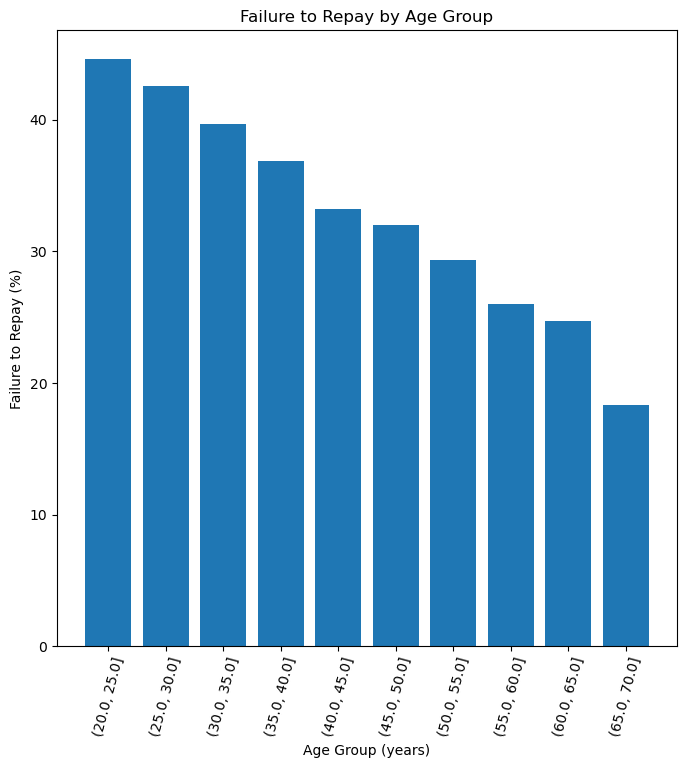

In [8]:
age_data = result_df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

age_groups  = age_data.groupby('YEARS_BINNED').mean()

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

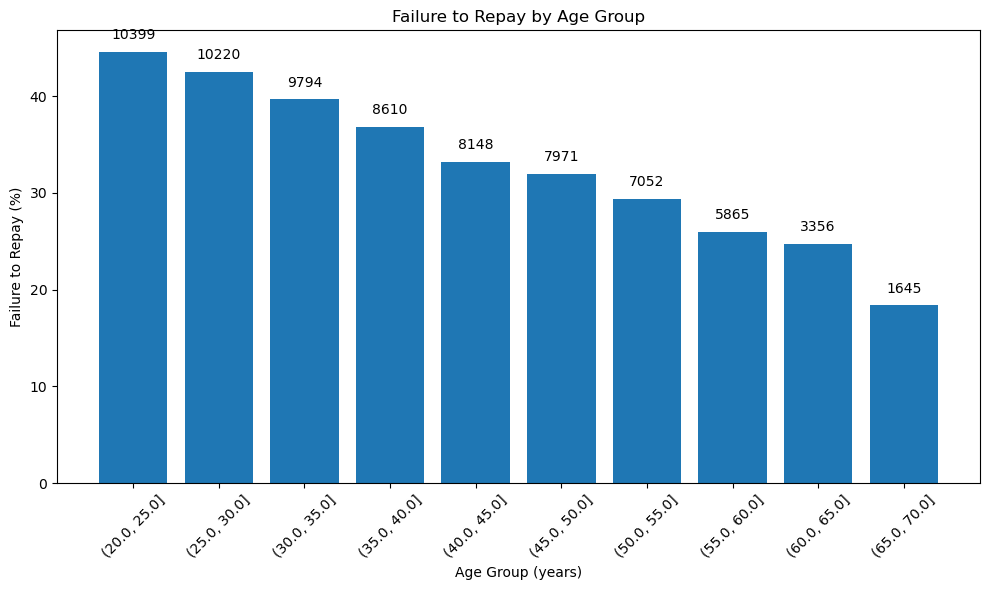

In [9]:
age_counts = age_data['YEARS_BINNED'].value_counts()

plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Annotate each bar with its count
for bar, count in zip(bars, age_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, count, ha='center', va='bottom')

# Plot labeling
plt.xticks(rotation=45)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

plt.tight_layout()
plt.show()

In [10]:
total = result_df.isnull().sum().sort_values(ascending = False)
percent = (result_df.isnull().sum()/result_df.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,51910,71.051191
COMMONAREA_AVG,51910,71.051191
COMMONAREA_MODE,51910,71.051191
NONLIVINGAPARTMENTS_MODE,51588,70.610457
NONLIVINGAPARTMENTS_AVG,51588,70.610457
NONLIVINGAPARTMENTS_MEDI,51588,70.610457
LIVINGAPARTMENTS_MODE,50902,69.671503
LIVINGAPARTMENTS_AVG,50902,69.671503
LIVINGAPARTMENTS_MEDI,50902,69.671503
FONDKAPREMONT_MODE,50873,69.631809


In [11]:
columns_to_drop = missing_application_train_data[missing_application_train_data['Percent'] > 60].index

# Drop the selected columns from the original DataFrame
df_filtered = result_df.drop(columns=columns_to_drop)

In [12]:
df_filtered.shape

(73060, 99)

In [13]:
list(result_df.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [14]:
a=['TARGET','CODE_GENDER','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED',"NAME_FAMILY_STATUS",'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
df_filtered=result_df[a]

In [15]:
df_filtered.head()

,TARGET,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_FAMILY_STATUS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,M,0,202500.0,406597.5,24700.5,-9461,-637,Single / not married,0.083037,0.262949,0.139376
1,1,F,0,112500.0,979992.0,27076.5,-18724,-2628,Widow,NaN,0.548477,0.190706
2,1,M,0,202500.0,1193580.0,35028.0,-17482,-1262,Married,NaN,0.306841,0.320163
3,1,F,0,135000.0,288873.0,16258.5,-13384,-3597,Civil marriage,0.468208,0.674203,0.399676
4,1,F,0,81000.0,252000.0,14593.5,-24794,365243,Married,NaN,0.023952,0.720944


In [16]:
df_filtered.dtypes.value_counts()

float64    6
int64      4
object     2
dtype: int64

In [17]:
df_filtered['DAYS_BIRTH']=df_filtered['DAYS_BIRTH']/-365

In [18]:
df_filtered["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [19]:
df_filtered['DAYS_EMPLOYED'] = df_filtered['DAYS_EMPLOYED'].apply(lambda x: x * -1 if x < 0 else x)

In [21]:
numeric_columns = df_filtered.select_dtypes(include=['int', 'float']).columns

# Fill missing values with the mean of each column
df_filtered[numeric_columns] = df_filtered[numeric_columns].fillna(df_filtered[numeric_columns].mean())

In [22]:
df_filtered.dtypes.value_counts()

float64    8
int64      2
object     2
dtype: int64

In [23]:
object_columns = df_filtered.select_dtypes(include=['object']).columns

# Fill missing values with the mode of each column
for col in object_columns:
    mode_value = df_filtered[col].mode()[0]  # mode() returns a Series, so we access the first value
    df_filtered[col].fillna(mode_value, inplace=True)

In [27]:
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for col in df_filtered.columns:
    # Check if the column contains object dtype (categorical)
    if df_filtered[col].dtype == 'object':
        # Fit label encoder and transform values of the column
        df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
        


In [25]:
df_filtered.dtypes.value_counts()

float64    8
int64      2
object     2
dtype: int64

In [28]:
encoded_values = {}

# Iterate over each column in the DataFrame
for col in df_filtered.columns:
    # Check if the column contains object dtype (categorical)
    if df_filtered[col].dtype == 'object':
        # Fit label encoder and transform values of the column
        df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
        # Get the mapping of original values to encoded values
        encoded_values[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the encoded values
for col, mapping in encoded_values.items():
    print(f"Encoded values for column '{col}':")
    for original_value, encoded_value in mapping.items():
        print(f"  Original value: {original_value}, Encoded value: {encoded_value}")

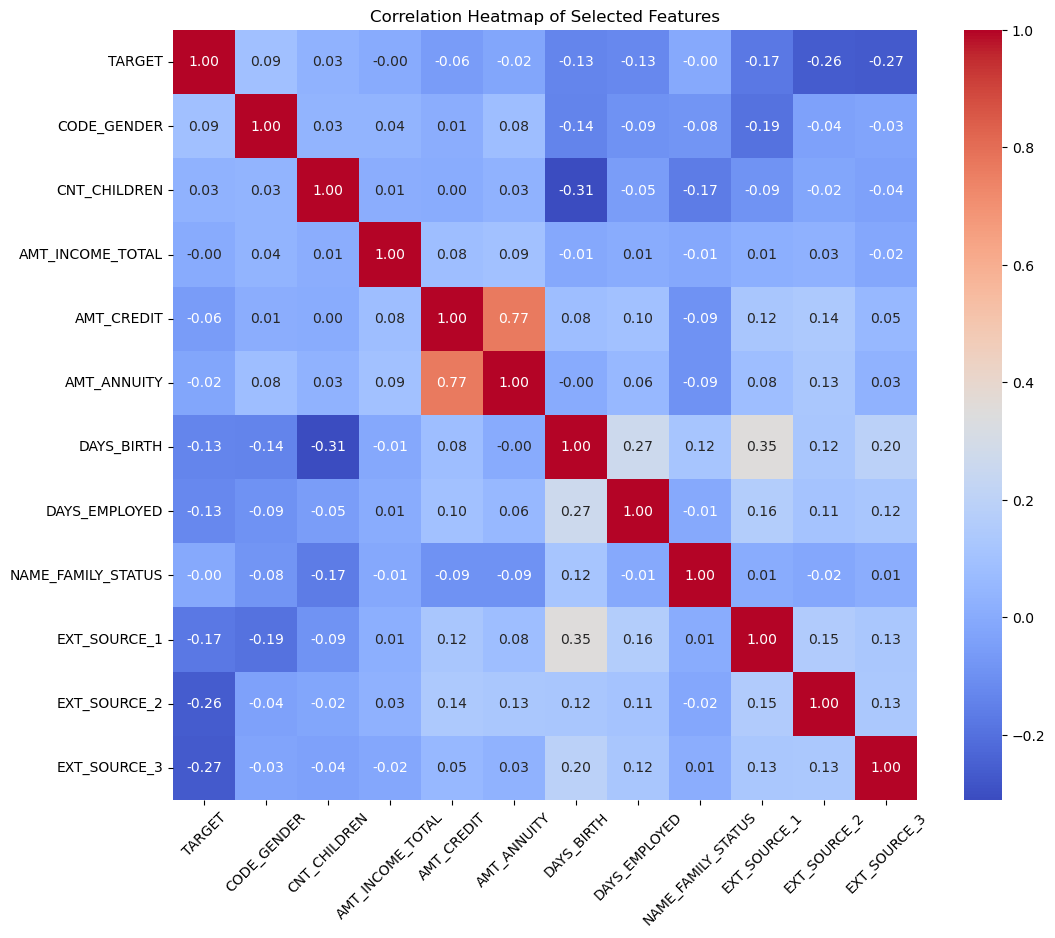

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for correlation analysis
selected_features = ['TARGET', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
                     'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                     'NAME_FAMILY_STATUS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Create a correlation matrix
correlation_matrix = df_filtered[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()


In [30]:
list(df_filtered.columns)

['TARGET',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'NAME_FAMILY_STATUS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming train_labels is your target variable
Target = df_filtered['TARGET']

features = df_filtered.drop(columns=["TARGET"])


# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C=0.0001)

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, Target, test_size=0.25, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val)

# Example evaluation metric (you can use any appropriate evaluation metric)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.663235696687654


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming train_labels is your target variable
Target = df_filtered['TARGET']

# Exclude_columns = ['SK_ID_CURR', 'TARGET']
features = df_filtered.drop(columns=["TARGET"])

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, Target, test_size=0.25, random_state=4)

# Make the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Example evaluation metric (you can use any appropriate evaluation metric)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.7094442923624418


In [300]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

In [303]:
X_val["DAYS_EMPLOYED"]

30733      706.000000
59973      290.000000
68187     8048.000000
22051     1611.000000
61071     5101.000000
             ...     
12014      108.000000
37677     2642.000000
14974      658.000000
17157     1220.000000
55247    63815.045904
Name: DAYS_EMPLOYED, Length: 18707, dtype: float64